# SciPy类库

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# 绘图时的中文设置
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['simhei']
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.unicode_minus'] = False

**最小二乘拟合算法**

真实数据： [10, 0.34, 0.5235987755982988]
拟合参数： [-10.16033405   0.33655019  -2.68814961]


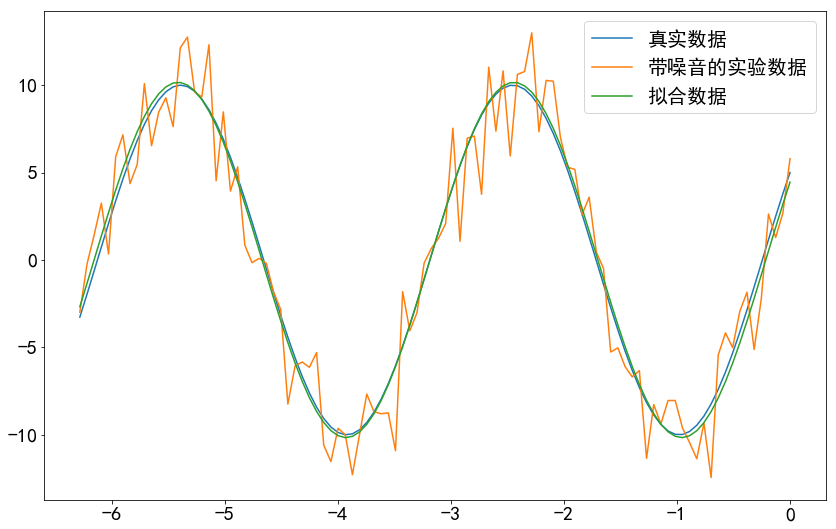

In [18]:
from scipy.optimize import leastsq
def func(x,p):
    '''
    数据拟合所用的函数 A*sin(2 * pi * k * x + theta )
    '''
    A,k,theta = p
    return A * np.sin(2 * np.pi * k * x + theta)

def residuals(p,y,x):
    '''
    实验数据x,y和拟合函数之间的差，p为拟合函数需要找到的系数
    '''
    return y - func(x,p)

x = np.linspace(0, -2 * np.pi,100)
A,k,theta = 10,0.34,np.pi/6  # 真实数据的函数参数
y0 = func(x,[A,k,theta]) # 模拟真实的数据
y1 = y0 + 2 * np.random.randn(len(x)) # 加入噪音之后的实验数据
p0 =[7,0.2,0] # 第一次猜测的函数拟合参数

# 调用leastsq进行数据拟合
# residuals为计算误差的函数
# p0为拟合函数的初始值
# args为需要拟合的实验数据
plsq = leastsq(residuals,p0,args=(y1,x))
print("真实数据：",[A,k,theta])
print("拟合参数：", plsq[0]) # 实验数据拟合后的参数
plt.figure(figsize=(14,9))
plt.plot(x,y0,label='真实数据')
plt.plot(x,y1,label='带噪音的实验数据')
plt.plot(x,func(x,plsq[0]),label='拟合数据')
plt.legend()
plt.show()

**统计函数分析随机数**

In [6]:
import scipy.stats as stats

均值-标准差: (0.044078125193956187, 1.0046234158688889)
偏值-pvalue: SkewtestResult(statistic=0.083854329527482452, pvalue=0.93317225136832505)
峰值-pvalue： KurtosistestResult(statistic=-1.4654953134769546, pvalue=0.14278583005941417)
正态性检验-pvalue: NormaltestResult(statistic=2.1547080624034209, pvalue=0.34049527463877655)
数据所在的区段中95%的数值： 1.7465949174


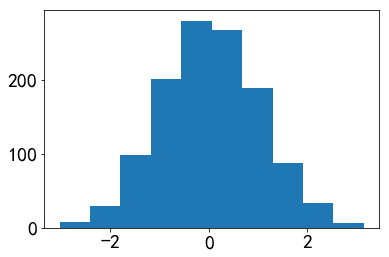

In [13]:
# 使用的scipy.stats 包按正态分布生成随机数
gen = stats.norm.rvs(size=1200)
# 用正态分布去拟合生成的数据，得到起均值和标准差
print("均值-标准差:", stats.norm.fit(gen))
# 偏值,描述的是概率分布的偏斜(非对称)程度。
# 该检验有两个返回值，其中第2个返回值为p-value
print("偏值-pvalue:", stats.skewtest(gen))
# 峰值，描述的是概率分布曲线的走势程度。
print("峰值-pvalue：", stats.kurtosistest(gen))
# 正态性检验，可以检查数据集正态分布的程度
print("正态性检验-pvalue:", stats.normaltest(gen))
# 使用Scripy可以方便得到数据所在的区段中某一百分比处的数据
print("数据所在的区段中95%的数值：", stats.scoreatpercentile(gen,95))
plt.hist(gen)
plt.show()

**线性方程组求解**

In [14]:
from scipy import linalg

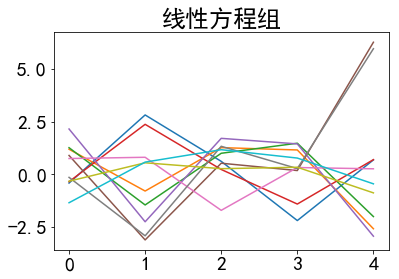

In [16]:
m,n = 5,5
a = np.random.rand(m,n)
b = np.random.rand(m,n)

def linerFun():
    # linalg.solve方法主要解线性方程组
    x = linalg.solve(a,b)
    return x

plt.title("线性方程组")
plt.plot(linerFun())
plt.show()

**插值**

In [17]:
from scipy import interpolate

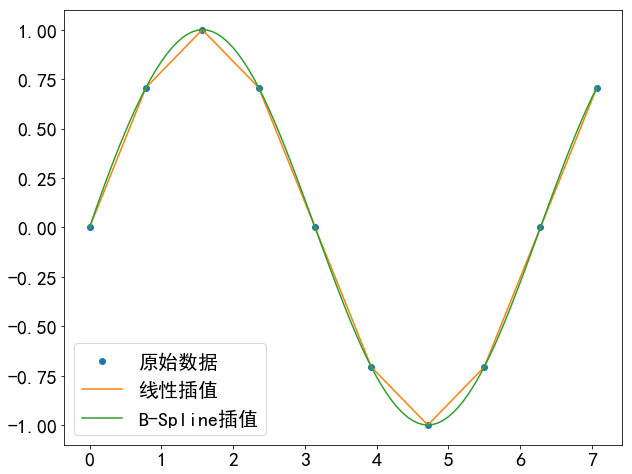

In [24]:
# 通过interp1d函数直接得到一个新的线性插值函数。
# 而B-Spline插值运算需要先使用splev函数计算处B-Spline曲线的参数
# 然后将参数传递给splev函数计算处各个取样点的插值结果
x = np.linspace(0, 2 * np.pi + np.pi/4,10)
y = np.sin(x)

x_new = np.linspace(0,2 * np.pi + np.pi/4, 100)
f_liner = interpolate.interp1d(x,y)
tck = interpolate.splrep(x,y)
y_bspline = interpolate.splev(x_new,tck)
plt.figure(figsize=(10,8))
plt.plot(x,y,'o', label='原始数据')
plt.plot(x_new,f_liner(x_new), label='线性插值')
plt.plot(x_new,y_bspline, label='B-Spline插值')
plt.legend()
plt.show()

**累计计算积分**

In [25]:
from scipy import integrate

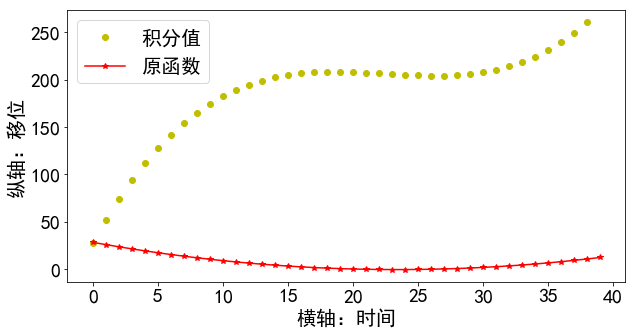

In [33]:
plt.figure(figsize=(10,5))
x = np.linspace(-2,2,40)
y = 5 * x ** 2 - 4 * x
y_int = integrate.cumtrapz(y)
plt.plot(y_int,'yo',label="积分值")
plt.plot(y,'r*-',label='原函数')
plt.xlabel('横轴：时间')
plt.ylabel('纵轴：移位')
plt.legend(loc=0)
plt.show()

**洛伦兹吸引子的轨迹**

In [34]:
from scipy.integrate import odeint

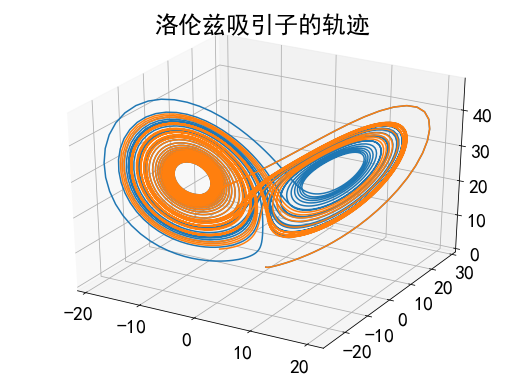

In [36]:
def lorenz(w,t,p,r,b):
    # 给出位置矢量w,和三个参数p,r,b
    # dx/dt,dy/dt,dz/dt的值
    x,y,z = w
    # 直接与lorenz的计算公式
    return np.array([p * (y - x), x * (r - z) -y, x * y -b *z])

t = np.arange(0,40,0.01) # 创建时间点
# 调用odeint对lorenz进行求解，用两个不同的初始值
track1 = odeint(lorenz,(0.0,1.00,0.0),t,args=(10.0,28.0,3.0))
track2 = odeint(lorenz,(0.0,1.01,0.0),t,args=(10.0,28.0,3.0))

# 绘制3D图
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.plot(track1[:,0],track1[:,1],track1[:,2])
ax.plot(track2[:,0],track2[:,1],track2[:,2])
plt.title('洛伦兹吸引子的轨迹')
plt.show()